# Tarefa 3 - Parte 1 - Classificação com KNN

### Nesta tarefa, você deve carregar o dataset `heart-disease.csv` e classificar seus registros em uma categoria binária (0: não possui Heart Disease | 1: possui Heart Disease), usando a técnica KNN. Lembrem-se de aplicar as metodologias de pré-processamento e avaliar os modelos criados a partir das ferramentas mostradas em aula.

Dica: Para toda a tarefa, além da biblioteca pandas e matplotlib, você pode querer explorar funções da biblioteca de código aberto sci-kit-learn (https://scikit-learn.org/stable/index.html ), em particular os pacotes:
- preprocessing
- tree
- neighbors

## Descrição dos atributos da base de dados heart-disease (disponível no EAD):
- age (Age of the patient in years)
- sex (Male/Female)
- cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
- trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- chol (serum cholesterol in mg/dl)
- fbs (if fasting blood sugar > 120 mg/dl)
- restecg (resting electrocardiographic results). Values: [normal, stt abnormality, lv hypertrophy]
- thalach: maximum heart rate achieved
- exang: exercise-induced angina (True/ False)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by fluoroscopy
- thal: [normal; fixed defect; reversible defect]
- target: the predicted attribute, whether it has heart disease or not.

Há 303 registros.


## Importe os pacotes

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np

## Importe a base de dados

###Crie um DataFrame a partir do arquivo de dados disponibilizados no EaD

In [2]:
df = pd.read_csv('heart-disease.csv',sep=',')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Verifique se o dataset está balanceado entre o número de casos positivos e negativos de heart disease. Sendo essa feature a coluna `['target']`

In [3]:
positivos_e_negativos = df['target'].value_counts()
print(positivos_e_negativos)

1    165
0    138
Name: target, dtype: int64


Logo, df possui 165 casos positivos e 138 negativos.

##Preparação da base

- Explore as técnicas de pré-processamento vistas em aula apropriadas para esse contexto, com o objetivo de aumentar a qualidade do seu modelo.

- Divida os dados em conjuntos de treino e teste. Para isso, selecione aleatoriamente e sem reposição (para que não se repitam) 75% dos registros para o conjunto de treinamento. As observações restantes (25%) serão usadas para o conjunto de teste.

Dicas:
- Fixe a semente de geração de dados aleatórios (escolha um número), utilize o comando `np.random.seed(escolha um número)`, antes de executar qualquer célula de comando que possa variar de valor resultante toda vez que for executada.

In [4]:
dados_faltantes = df.isnull().sum()
print(dados_faltantes)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler
colunas_padronizar = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[colunas_padronizar] = StandardScaler().fit_transform(df[colunas_padronizar])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


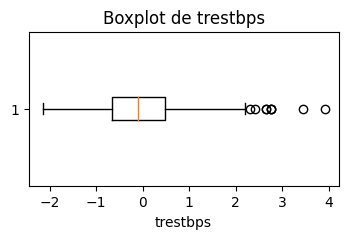

In [6]:
plt.figure(figsize=(4, 2))
plt.boxplot(df['trestbps'], vert=False)

plt.xlabel('trestbps')
plt.title('Boxplot de trestbps')

plt.show()

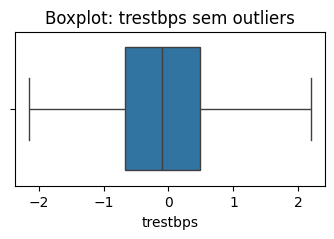

In [7]:
#retirando os outliers ou noises de trestbps

q1 = df['trestbps'].quantile(0.25)
q3 = df['trestbps'].quantile(0.75)
iqr = q3 - q1

lim_inferior = q1 - 1.5 * iqr
lim_superior = q3 + 1.5 * iqr

df_sem_out = df[(df['trestbps'] >= lim_inferior) & (df['trestbps'] <= lim_superior)]

plt.figure(figsize=(4, 2))
sns.boxplot(x=df_sem_out['trestbps'])
plt.title('Boxplot: trestbps sem outliers')
plt.xlabel('trestbps')
plt.show()

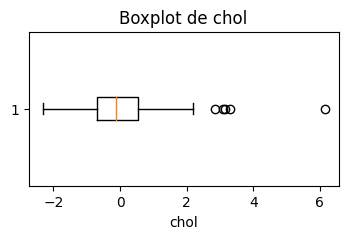

In [8]:
plt.figure(figsize=(4, 2))
plt.boxplot(df_sem_out['chol'], vert=False)

plt.xlabel('chol')
plt.title('Boxplot de chol')

plt.show()

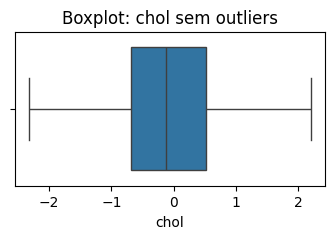

In [9]:
#retirando os outliers ou noises de chol

Q1 = df_sem_out['chol'].quantile(0.25)
Q3 = df_sem_out['chol'].quantile(0.75)
iqr = Q3 - Q1

lim_inferior_chol = Q1 - 1.5 * iqr
lim_superior_chol = Q3 + 1.5 * iqr

df_sem_outl = df[(df['chol'] >= lim_inferior_chol) & (df['chol'] <= lim_superior_chol)]

plt.figure(figsize=(4, 2))
sns.boxplot(x=df_sem_outl['chol'])
plt.title('Boxplot: chol sem outliers')
plt.xlabel('chol')
plt.show()

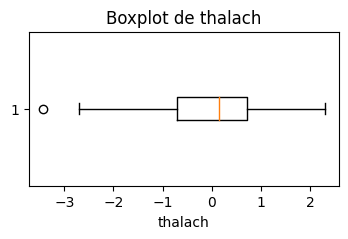

In [10]:
plt.figure(figsize=(4, 2))
plt.boxplot(df['thalach'], vert=False)

plt.xlabel('thalach')
plt.title('Boxplot de thalach')

plt.show()

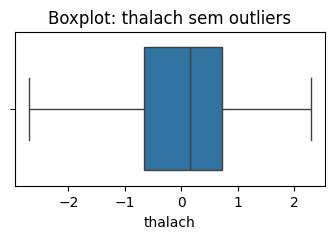

In [11]:
#retirando os outliers ou noises de thalach

Q1 = df_sem_outl['thalach'].quantile(0.25)
Q3 = df_sem_outl['thalach'].quantile(0.75)
iqr = Q3 - Q1

lim_inferior_thalach = Q1 - 1.5 * iqr
lim_superior_thalach = Q3 + 1.5 * iqr

df_sem_outlin = df[(df['thalach'] >= lim_inferior_thalach) & (df['thalach'] <= lim_superior_thalach)]

plt.figure(figsize=(4, 2))
sns.boxplot(x=df_sem_outlin['thalach'])
plt.title('Boxplot: thalach sem outliers')
plt.xlabel('thalach')
plt.show()

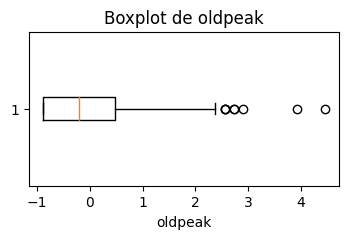

In [12]:
plt.figure(figsize=(4, 2))
plt.boxplot(df['oldpeak'], vert=False)

plt.xlabel('oldpeak')
plt.title('Boxplot de oldpeak')

plt.show()

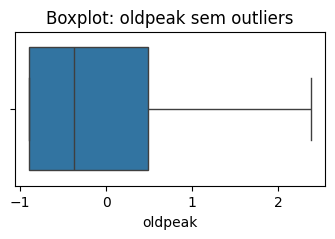

In [13]:
#retirando os outliers ou noises de oldpeak

Q1 = df_sem_outl['oldpeak'].quantile(0.25)
Q3 = df_sem_outl['oldpeak'].quantile(0.75)
iqr = Q3 - Q1

lim_inferior_oldpeak = Q1 - 1.5 * iqr
lim_superior_oldpeak = Q3 + 1.5 * iqr

df_sem_outliner = df[(df['oldpeak'] >= lim_inferior_oldpeak) & (df['oldpeak'] <= lim_superior_oldpeak)]

plt.figure(figsize=(4, 2))
sns.boxplot(x=df_sem_outliner['oldpeak'])
plt.title('Boxplot: oldpeak sem outliers')
plt.xlabel('oldpeak')
plt.show()

## Criação de conjuntos de treinamento e de teste

In [14]:
#np.random.seed(escolha um numero)

from sklearn.model_selection import train_test_split

np.random.seed(36)

X = df_sem_outliner.drop("target", axis=1)
y = df_sem_outliner["target"]

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.25, random_state=36)

print("X_treinamento:", X_treinamento.shape)
print("X_teste:", X_teste.shape)
print("y_treinamento:", y_treinamento.shape)
print("y_teste:", y_teste.shape)

X_treinamento: (221, 13)
X_teste: (74, 13)
y_treinamento: (221,)
y_teste: (74,)


## Treine e teste o modelo de KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_treinamento, y_treinamento)

KNeighborsClassifier(n_neighbors=3)

### Construa a matriz de confusão

Dica: você pode usar a função `confusion_matrix(_, _)` da biblioteca `scikitlearn.metrics`

In [16]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_teste)
matrix_confus= confusion_matrix(y_teste, y_pred)

# Exibir a matriz de confusão
print("Matriz de Confusão:")
print(matrix_confus)

Matriz de Confusão:
[[26 10]
 [ 2 36]]


**Interprete e explique a matriz de confusão gerada.**



A matriz de confusão é uma tabela que descreve o desempenho de um modelo de classificação. Dessa forma, a interpretação da matriz se dá pelos números de verdadeiros negativos, falsos positivos, falsos negativos e verdadeiros positivos. Verdadeiros Negativos: 26 casos foram corretamente classificados como ausência de doença cardíaca. Falsos Positivos: 10 casos foram incorretamente classificados como presença de doença cardíaca, ou seja, o modelo previu a presença de doença cardíaca quando na verdade não havia. Falsos Negativos: 2 casos foram incorretamente classificados como ausência de doença cardíaca, ou seja, o modelo previu a ausência de doença cardíaca quando na verdade havia. Verdadeiros Positivos: 36 casos foram corretamente classificados como presença de doença cardíaca.

### Calcule e mostre a acurácia

In [17]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_teste, y_pred)

print("A acurácia é de:", acuracia)

A acurácia é de: 0.8378378378378378


### Calcule e mostre as métricas de precisão, cobertura (recall) e medida F1 para cada classe, além da acurácia, todas para o conjunto de teste.

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score
acuracia = accuracy_score(y_teste, y_pred)
precisao = precision_score(y_teste, y_pred, average=None)
cobertura = recall_score(y_teste, y_pred,average=None )
f1_yteste = f1_score(y_teste, y_pred,average=None)

# Exibindo as métricas
print("Acurácia:", acuracia)
print("Precisão y_teste:", precisao)
print("Recall (cobertura) y_teste:", cobertura)
print("Medida F1 y_teste:", f1_yteste)

Acurácia: 0.8378378378378378
Precisão y_teste: [0.92857143 0.7826087 ]
Recall (cobertura) y_teste: [0.72222222 0.94736842]
Medida F1 y_teste: [0.8125     0.85714286]


####Escolha uma das métricas previamente calculadas (acurácia, precisão, cobertura e medida F1) e calcule seu valor a partir da matriz de confusão.

In [19]:
positivos_verdad= matrix_confus[0][0]
positivos_falsos= matrix_confus[1][0]
precisao_matriz = positivos_verdad / (positivos_verdad + positivos_falsos)

print("Precisão calculada pela matriz:", precisao_matriz)

Precisão calculada pela matriz: 0.9285714285714286


## Plote uma ROC Curve e calcule a AUC (Area Under Curve) para avaliar o modelo. Explique seu funcionamento **(PONTO EXTRA)**
Dica: procure pela função `RocCurveDisplay.from_estimator`

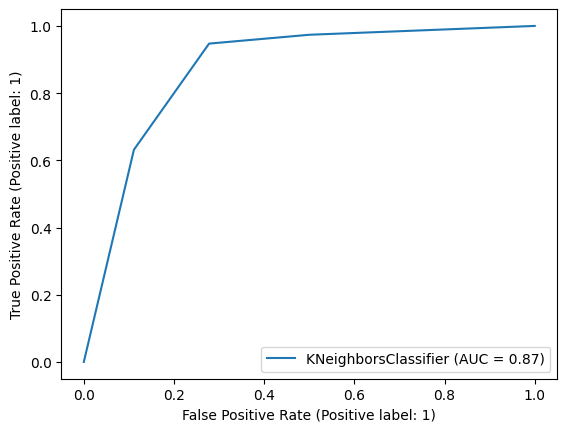

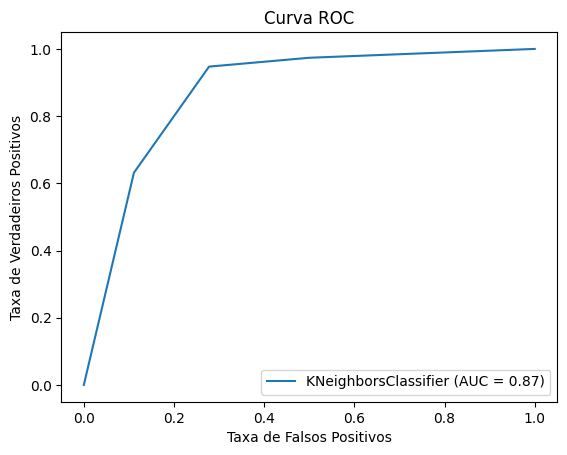

AUC : 0.8735380116959065


In [20]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# Calcular as probabilidades previstas
y_proba = knn.predict_proba(X_teste)[:, 1]

# Plotar a curva ROC
roc_display = RocCurveDisplay.from_estimator(knn, X_teste, y_teste)
roc_display.plot()
plt.title("Curva ROC")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.show()

# Calcular a AUC
auc = roc_auc_score(y_teste, y_proba)
print("AUC :", auc)




A curva ROC e a AUC (area under curve) são ferramentas importantes na avaliação de modelos de classificação. A curva ROC é uma representação gráfica que mostra como o modelo está se saindo em diferentes pontos de corte, ou seja, diferentes limiares de classificação. Ela plota a taxa de verdadeiros positivos (TPR) em relação à taxa de falsos positivos (FPR) em uma escala de 0 a 1. O TPR representa a proporção de casos positivos que o modelo classifica corretamente, enquanto o FPR representa a proporção de casos negativos que o modelo classifica incorretamente como positivos. A AUC é a área sob a curva ROC e fornece uma medida do desempenho global do modelo. Quanto maior a AUC, melhor o modelo está em distinguir entre as classes positiva e negativa. Dessa forma, a curva ROC e a AUC nos ajudam a entender o quão bem nosso modelo está performando em diferentes cenários de classificação, permitindo-nos avaliar sua eficácia de forma abrangente e intuitiva.